In [2]:
pip install unyt

Note: you may need to restart the kernel to use updated packages.


In [1]:
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

901
-986.541861068831


<function matplotlib.pyplot.show(close=None, block=None)>

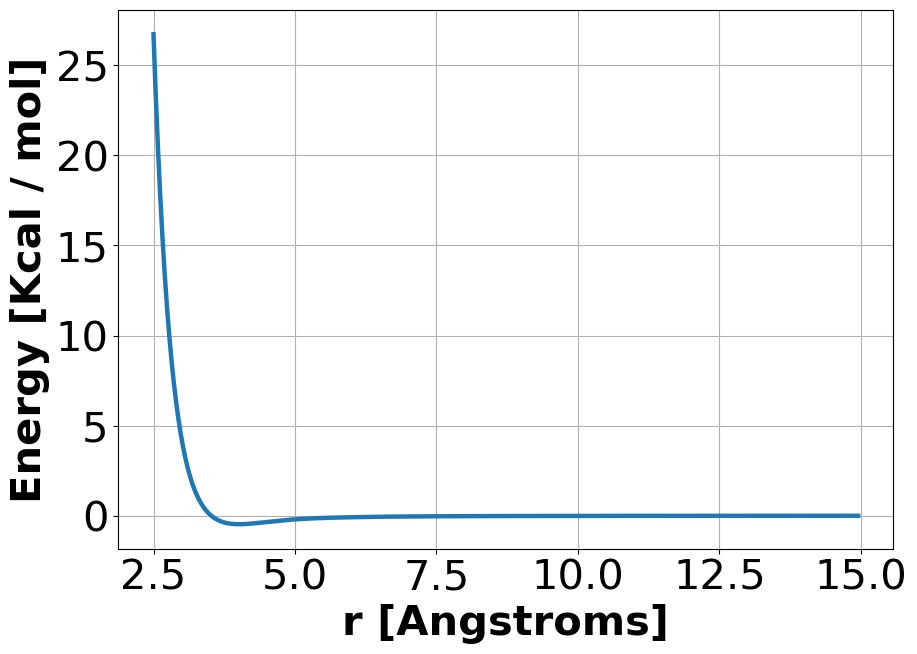

In [2]:
import numpy as np
import matplotlib.pyplot as plt

E = []
x = []
f = open("Cl_Ar_Energy_Profile.txt", "r")  

for i in range(466):
    f.readline()

lines = f.readlines()
print(len(lines))
reduced_r = len(lines) 
for i in range(1, len(lines) , 2):
    line = lines[i]
    line = line.split()
    E.append(float(line[4]))

f.close()

E = np.array(E)
print(E[0])
for i in range(411-50):
    x_i = (i)/100 + 2.5
    x.append(x_i)
for i in range(89):
    x_j = (i+1)/10 + 6.05 
    x.append(x_j)
    
x = np.array(x)    

E_c = (((E * 627.503) + (986.584451957740 * 627.503))) 

plt.rcParams['font.size'] = 30
plt.figure(figsize=(10,7))
plt.plot(x, E_c, linewidth = 3.2)
plt.xlabel('r [Angstroms]', fontweight = 'bold')
plt.ylabel('Energy [Kcal / mol]', fontweight = 'bold')
plt.grid(True)

plt.show


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt
    
def regression_func(theta, x,y): 
    e = y - BM(x, theta);
    return e

def regression_func_sse(theta, x,y): 
    e = sum(((y - BM(x, theta)))**2)
    return e

def BM(x, theta):
    return (theta[0] * np.exp((theta[1] - x)/theta[2])) - (theta[3] / x**6) - (theta[4] / x**8)

y = E_c

theta0 = np.array([2.805, 2.55, 0.198, 150, 222]) #(A, sig, rho, C, D)
bnds = np.array([[1.2, 9.0],[0.1, 10], [0.02,1.0], [10,1000000], [10,10000]])

nl_results = optimize.minimize(regression_func_sse, theta0, args=(x,y), method = "Nelder-Mead", bounds = bnds, tol=1e-50 )

theta = nl_results.x
print("theta = ",theta)

theta =  [4.54103704e+00 3.23538398e+00 3.31525872e-01 3.67583722e+03
 1.06072098e+01]


In [4]:
# y_pred = BM(theta, A, sig, rho, C, D)
e2 = regression_func(theta, x,y)
SSE = sum(regression_func(theta, x,y)**2)
print("Error", SSE)

print(np.mean(E_c))
TSS = sum((E_c - np.mean(E_c))**2)
print(TSS)

R_squared = 1-(SSE/TSS)
print('The R{} value is'.format(get_super('2')), R_squared.round(5))

Error 0.09295156200685173
1.4467536868030826
9511.529917489457
The R² value is 0.99999


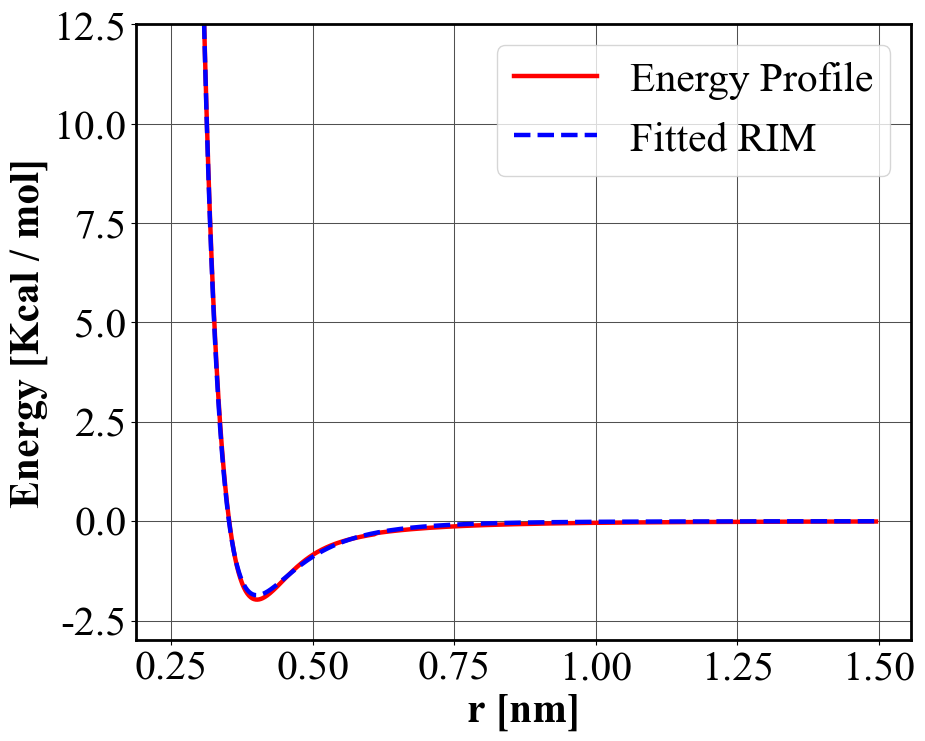

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman' 
mpl.rcParams['font.size'] = 30 
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 30 
mpl.rcParams['legend.fontsize'] = 30 

y_pred = BM(x,theta) * 4.184 #conversion to kJ
y2 = y*4.184 #conversion to kJ

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x/10,y2,'r-',linewidth=3.2,label='Energy Profile')
plt.plot(x/10,y_pred,'--b',linewidth=3.2,label='Fitted RIM')
plt.xlabel('r [nm]')
plt.ylabel('Energy [Kcal / mol]')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.ylim(-3.0, 12.5)
plt.grid(True, which='both', linestyle='-', color='#505050', linewidth=0.75)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
plt.legend()
plt.show()

